In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
name = 'fil2_cluster_mergeRPKM'
df = pd.read_csv(name)
df

,Unnamed: 0,id,k_means_8,te_T0,te_T1,te_T2,RNA_0,RNA_1,RNA_2,totalRPF_0,totalRPF_1,totalRPF_2
0,1,NM_000017,1,-0.25,-0.01,-0.08,16.989265,25.110714,24.362797,26.123529,48.724427,39.535561
1,2,NM_000019,1,0.80,1.31,0.87,26.042304,72.290269,40.451097,82.032437,349.600307,126.360218
2,5,NM_000026,1,-0.51,0.11,-0.18,52.997143,77.573460,27.753913,67.416076,161.800902,42.035489
3,8,NM_000032,1,-0.56,0.14,-0.17,5.734059,132.208271,1286.956710,7.247410,288.038006,1968.605470
4,10,NM_000043,1,0.29,0.68,0.49,7.744028,10.269912,23.348985,17.208136,31.721739,56.468005
...,...,...,...,...,...,...,...,...,...,...,...,...
9653,9632,NM_207197,8,-1.13,-1.12,-0.98,23.359860,12.381190,6.759440,19.484192,10.747733,5.882832
9654,9640,NM_207344,8,0.31,0.34,0.78,7.004402,8.968724,3.612236,15.915184,22.001069,10.607554
9655,9644,NM_207356,8,0.71,0.77,1.18,17.774551,19.678959,8.178423,53.594530,63.878582,31.732365
9656,9645,NM_207368,8,-0.15,0.06,0.53,39.446137,14.217325,10.561080,65.031174,28.879108,26.525031


In [102]:
dat = df.drop(['Unnamed: 0','id','k_means_8'],axis=1)
up = max(dat['te_T0'])
down = min(dat['te_T0'])
dat[['RNA_0','RNA_1','RNA_2','totalRPF_0','totalRPF_1','totalRPF_2']] = np.log(dat[['RNA_0','RNA_1','RNA_2','totalRPF_0','totalRPF_1','totalRPF_2']])
#dat[['RNA_0','RNA_1','RNA_2','totalRPF_0','totalRPF_1','totalRPF_2']] = np.log(np.log(dat[['RNA_0','RNA_1','RNA_2','totalRPF_0','totalRPF_1','totalRPF_2']]))
#dat['RNA_0'] = (dat['RNA_0'] - (dat['RNA_0']).mean()) / (dat['RNA_0'].std())# * (up-down) +down
dat['RNA_0'] = (dat['RNA_0'] - min(dat['RNA_0'])) / (max(dat['RNA_0']) - min(dat['RNA_0'])) * (up-down) +down
dat['RNA_1'] = (dat['RNA_1'] - min(dat['RNA_1'])) / (max(dat['RNA_1']) - min(dat['RNA_1'])) * (up-down) +down
dat['RNA_2'] = (dat['RNA_2'] - min(dat['RNA_2'])) / (max(dat['RNA_2']) - min(dat['RNA_2'])) * (up-down) +down
dat['totalRPF_0'] = (dat['totalRPF_0'] - min(dat['totalRPF_0'])) / (max(dat['totalRPF_0']) - min(dat['totalRPF_0'])) * (up-down) +down
dat['totalRPF_1'] = (dat['totalRPF_1'] - min(dat['totalRPF_1'])) / (max(dat['totalRPF_1']) - min(dat['totalRPF_1'])) * (up-down) +down
dat['totalRPF_2'] = (dat['totalRPF_2'] - min(dat['totalRPF_2'])) / (max(dat['totalRPF_2']) - min(dat['totalRPF_2'])) * (up-down) +down

In [103]:
dat

,te_T0,te_T1,te_T2,RNA_0,RNA_1,RNA_2,totalRPF_0,totalRPF_1,totalRPF_2
0,-0.25,-0.01,-0.08,-0.440675,-0.140029,-1.047157,-0.698449,-0.160790,-1.122359
1,0.80,1.31,0.87,-0.076025,0.642006,-0.736536,0.211246,1.211002,-0.408158
2,-0.51,0.11,-0.18,0.530544,0.694173,-0.967321,0.055243,0.674690,-1.084672
3,-0.56,0.14,-0.17,-1.367930,1.088485,1.383099,-1.717784,1.076164,1.279679
4,0.29,0.68,0.49,-1.111394,-0.801275,-1.073196,-1.030322,-0.459551,-0.903247
...,...,...,...,...,...,...,...,...,...
9653,-1.13,-1.12,-0.98,-0.168825,-0.663002,-1.832610,-0.931567,-1.212973,-2.293396
9654,0.31,0.34,0.78,-1.197092,-0.901470,-2.216487,-1.092418,-0.714271,-1.931034
9655,0.71,0.77,1.18,-0.402100,-0.320299,-1.715869,-0.127157,0.027724,-1.257502
9656,-0.15,0.06,0.53,0.278444,-0.560730,-1.559237,0.026610,-0.524906,-1.367679


In [104]:
min(dat['RNA_2'])

-5.05

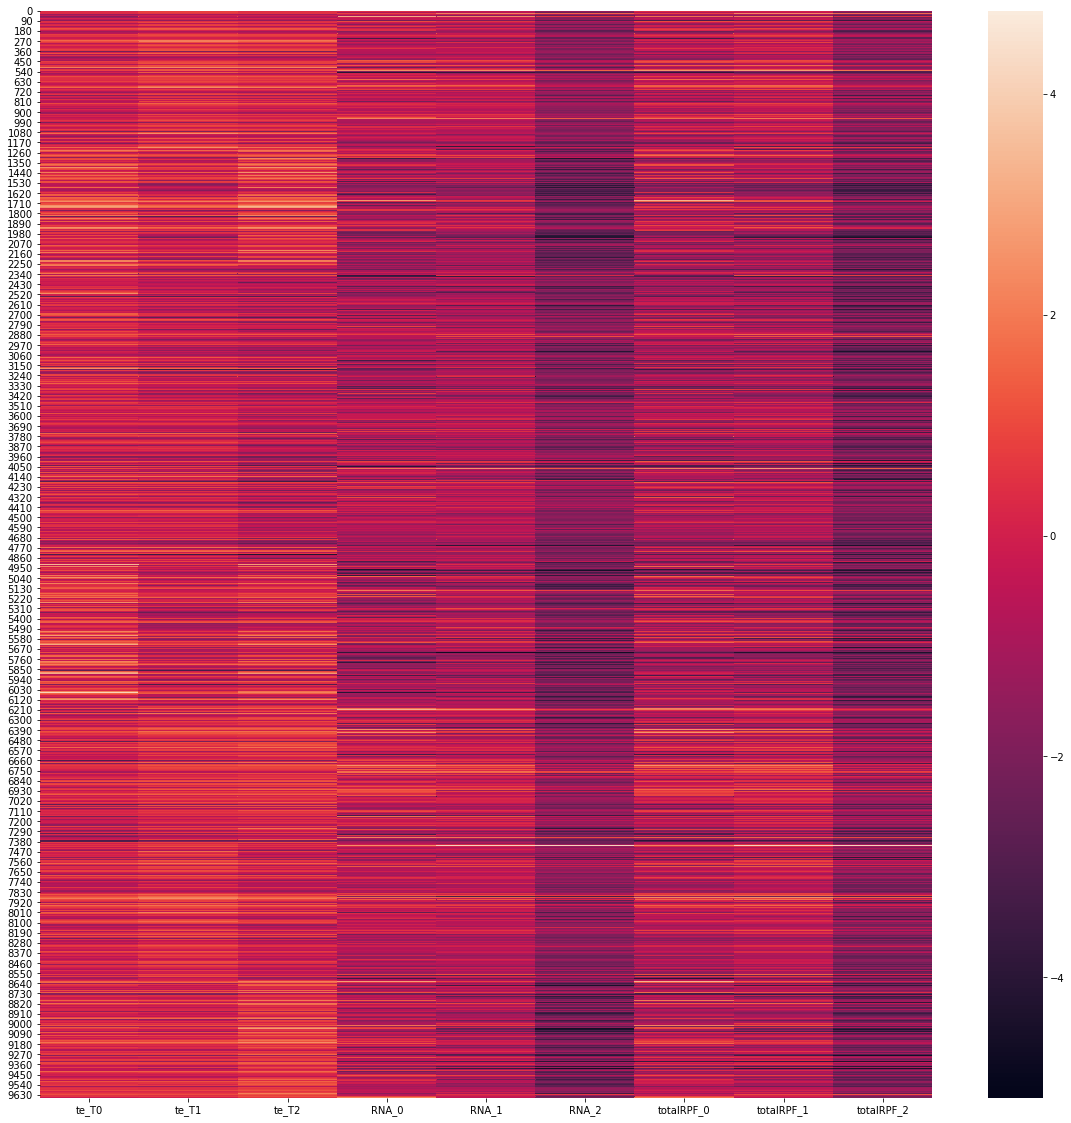

In [105]:
plt.figure(figsize=(20,20))
sns.heatmap(dat)
plt.savefig(name+'_logonce.png')

In [78]:
min(df['te_T0'])

-5.05

In [25]:
dat['RNA_0'] = (dat['RNA_0'] - min(dat['RNA_0'])) / (max(dat['RNA_0']) - min(dat['RNA_0'])) * (up-down) +down

4.1499999999999995